In [1]:
%pylab inline
import pandas as pd
import fastparquet 
import os,sys

Populating the interactive namespace from numpy and matplotlib


/home/lizhen09/miniconda2/envs/python27/lib/python2.7/site-packages/numba/errors.py:104: UserWarning: Insufficiently recent colorama version found. Numba requires colorama >= 0.3.9
  warnings.warn(msg)


In [2]:
import lightgbm as lgb

In [3]:
sys.path.insert(0,os.getcwd()+"/../../src/main")

In [4]:
!echo $LOCAL

/local/5178387


In [5]:
!mkdir $LOCAL/sandbox

mkdir: cannot create directory ‘/local/5178387/sandbox’: File exists


In [6]:
HOME=os.environ['LOCAL']+"/sandbox"
os.chdir(HOME)
os.getcwd()

'/local/5178387/sandbox'

In [7]:
os.environ['LANLEP_HOME']=HOME

In [8]:
import data

In [10]:
!ls /home/lizhen09/lanlep2019/input/feat/*.parq | grep -v offset_.parq | xargs -L1  -IINPUT cp INPUT {HOME}/input/feat/

In [12]:
!cp /home/lizhen09/lanlep2019/input/feat/*.pkl {HOME}/input/feat/

In [9]:
reload (data)

<module 'data' from '/home/lizhen09/mydev/lanlep2019/notebook/2/../../src/main/data.pyc'>

In [9]:
if 1:
    strategy = {'type':'byquake', "test_quakes":[[ 9,  4,  6] , [15,  1,  5], [10, 14,  3],  [7, 11,  2],  [8, 13, 12]]}
    types=['fwv']
    traintest = data.TrainTest('coverage', coverages=None, types=types, transform=None, valid_strategy=strategy)

In [10]:
traintest.num_dataset()

5

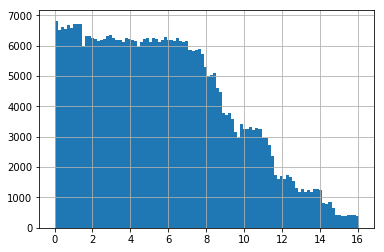

In [11]:
traintest.ydf.hist(bins=100);

In [12]:
np.abs(traintest.ydf-traintest.ydf.median()).mean()

3.0299900335398275

In [13]:
testdf=traintest.get_test_data()
testdf.shape

(2624, 100)

In [14]:
datadf=pd.concat([traintest.traindf, traintest.ydf],axis=1)
print datadf.shape
datadf.head()

(419359, 101)


fwv_0     fwv_1     fwv_2     fwv_3     fwv_4  \
index                                                                  
quake_14_o38092704  0.059493  0.288745  0.175394 -0.306433  0.127363   
quake_05_o21076314  0.193220  0.223538  0.108353 -0.108521  0.048008   
quake_09_o34152517  0.195538  0.221066  0.115602 -0.111520  0.071273   
quake_07_o29907005  0.120579  0.257296  0.096898 -0.180808  0.078737   
quake_03_o11370843  0.219481  0.194752  0.059049 -0.080931  0.064311   

                       fwv_5     fwv_6     fwv_7     fwv_8     fwv_9  ...  \
index                                                                 ...   
quake_14_o38092704  0.078662  0.099293  0.320627  0.193841 -0.237509  ...   
quake_05_o21076314 -0.075768  0.018792  0.188903  0.167017 -0.079257  ...   
quake_09_o34152517 -0.085213 -0.029911  0.200946  0.154639 -0.073049  ...   
quake_07_o29907005 -0.026547  0.014643  0.191294  0.165722 -0.116214  ...   
quake_03_o11370843 -0.142953 -0.051948  0.098170  0.169367  0.026442  ...   

                      fwv_91    fwv_92    fwv_93    fwv_94    fwv_95  \
index                                                                  
quake_14_o38092704  0.119633  0.019761  0.043149  0.216871  0.032755   
quake_05_o21076314  0.173315  0.101008  0.032328  0.010907  0.033171   
quake_09_o34152517  0.195082  0.087095  0.034098 -0.026654  0.023064   
quake_07_o29907005  0.154124  0.055500  0.069783  0.097929  0.058242   
quake_03_o11370843  0.203573  0.129579  0.062429 -0.040362  0.015726   

                      fwv_96    fwv_97    fwv_98    fwv_99         y  
index                                                                 
quake_14_o38092704  0.095359 -0.141673 -0.095935  0.154893  4.818398  
quake_05_o21076314  0.027125 -0.087466 -0.007180  0.079947  2.541899  
quake_09_o34152517  0.001101 -0.098248  0.031839  0.082902  0.727197  
quake_07_o29907005  0.032560 -0.102489 -0.025202  0.069889  8.299899  
quake_03_o11370843  0.013697 -0.070627  0.042443 -0.026576  5.864797  

[5 rows x 101 columns]

In [15]:
datadf= datadf[~datadf.index.duplicated(keep='first')]
datadf.shape

(419248, 101)

In [16]:
qdf=pd.DataFrame(datadf.index.map(lambda u: u.split("_")[1]).astype(np.int8),index=datadf.index)
qdf.head()

index
index                    
quake_14_o38092704     14
quake_05_o21076314      5
quake_09_o34152517      9
quake_07_o29907005      7
quake_03_o11370843      3

In [17]:
qdf['index'].value_counts().to_frame().sort_index().T

0      1      2      3      4      5      6      7      8      9   \
index  3766  29606  36381  22721  32572  20661  18112  41320  20285  24722   

          10     11     12     13     14     15    16  
index  29316  28282  22648  21974  37848  24269  4765

In [18]:
qdf=qdf[~qdf['index'].isin({0,16,2,7,14,4,10,1,11,15})]
datadf=datadf.loc[qdf.index]
ydf=datadf['y']
datadf=datadf.drop('y',axis=1)
qdf.shape,datadf.shape,ydf.shape

((151123, 1), (151123, 100), (151123,))

In [19]:
qlen=qdf['index'].value_counts().to_dict()
str(qlen)

'{3: 22721, 5: 20661, 6: 18112, 8: 20285, 9: 24722, 12: 22648, 13: 21974}'

In [20]:
quakes=set(qdf['index'])
quakes

{3, 5, 6, 8, 9, 12, 13}

In [21]:
import utils
n_thread= utils.get_num_thread()
n_thread

11

In [22]:
def topn(testv,n,trainX):
    assert n>0
    testv=testv.reshape((1,-1))
    delta =trainX-testv
    delta=np.sum(delta*delta,1)
    aindex=np.argsort(delta) 
    return list(aindex[:n])
    

In [23]:
testX=testdf.values
testX.shape

(2624, 100)

In [24]:
trainX=datadf.values
trainX.shape, qdf.shape

((151123, 100), (151123, 1))

In [25]:
%%time
topidxs  = []
for testv in testX:
    a = topn(testv,3000,trainX)
    topidxs += a

CPU times: user 19min 3s, sys: 1min 52s, total: 20min 55s
Wall time: 1min 54s


In [26]:
len(topidxs),len(set(topidxs)),len(testX),len(topidxs)/len(testX)

(7872000, 135883, 2624, 3000)

In [27]:
qdf.iloc[topidxs].head()

index
index                    
quake_06_o17988314      6
quake_06_o23373381      6
quake_06_o23373373      6
quake_06_o23382979      6
quake_06_o18021814      6

In [28]:
idxdf=pd.DataFrame(np.array(qdf.iloc[topidxs].values).reshape([-1,len(testX)],order='F'))

In [29]:
idxdf.shape

(3000, 2624)

In [30]:
idxdf.head()

0     1     2     3     4     5     6     7     8     9     ...  2614  \
0     6     6    13     6     8     9     6     8     9     6  ...     6   
1     6     6    13     6     8     9     6    13     5     6  ...     6   
2     6     6    13     6     8     9     6    13     3     6  ...     6   
3     6     6    13     6     8     9     6    13     9     6  ...     6   
4     6     6    13     6     8     9     6     9     9     6  ...     6   

   2615  2616  2617  2618  2619  2620  2621  2622  2623  
0     5    12     6     6    12     9     5     8     9  
1     5     6     6     6    12     9     5     8     9  
2     5    13     6     6    12     9     5     8     6  
3     5    12     6     6    12     9     5     8     9  
4     5    12     6     6    12     9     5     8     6  

[5 rows x 2624 columns]

In [31]:
lst=[]
for qno in quakes:
    print qno,
    a=(idxdf.iloc[:1000]==qno).mean().round(1).value_counts().to_frame()
    a['qno']=qno    
    lst.append(a)
print ""    
adf = pd.pivot_table(pd.concat(lst).reset_index(), index='index', columns='qno',values=[0])
display(np.round(adf/len(testX),2))
display(np.round(adf.sort_index(ascending=False).cumsum(0)/len(testX),2))

3 5 6 8 9 12 13 


0                                    
qno      3     5     6     8     9     12    13
index                                          
0.0    0.79  0.07  0.11  0.47  0.40  0.75  0.46
0.1    0.10  0.45  0.17  0.27  0.19  0.17  0.32
0.2    0.05  0.29  0.11  0.18  0.16  0.05  0.17
0.3    0.04  0.15  0.11  0.06  0.10  0.02  0.04
0.4    0.02  0.03  0.09  0.01  0.07  0.00  0.01
0.5    0.00  0.00  0.04  0.00  0.04  0.00   NaN
0.6    0.00   NaN  0.04   NaN  0.03   NaN   NaN
0.7     NaN   NaN  0.06   NaN  0.01   NaN   NaN
0.8     NaN   NaN  0.08   NaN   NaN   NaN   NaN
0.9     NaN   NaN  0.18   NaN   NaN   NaN   NaN
1.0     NaN   NaN  0.01   NaN   NaN   NaN   NaN

0                                    
qno      3     5     6     8     9     12    13
index                                          
1.0     NaN   NaN  0.01   NaN   NaN   NaN   NaN
0.9     NaN   NaN  0.19   NaN   NaN   NaN   NaN
0.8     NaN   NaN  0.27   NaN   NaN   NaN   NaN
0.7     NaN   NaN  0.33   NaN  0.01   NaN   NaN
0.6    0.00   NaN  0.37   NaN  0.04   NaN   NaN
0.5    0.00  0.00  0.41  0.00  0.08  0.00   NaN
0.4    0.02  0.03  0.50  0.01  0.14  0.00  0.01
0.3    0.06  0.18  0.61  0.08  0.24  0.02  0.05
0.2    0.11  0.48  0.71  0.26  0.41  0.08  0.22
0.1    0.21  0.93  0.89  0.53  0.60  0.25  0.54
0.0    1.00  1.00  1.00  1.00  1.00  1.00  1.00

In [32]:
lst=[]
for qno in quakes:
    print qno,
    a=(idxdf.iloc[:2000]==qno).mean().round(1).value_counts().to_frame()
    a['qno']=qno    
    lst.append(a)
print ""    
adf = pd.pivot_table(pd.concat(lst).reset_index(), index='index', columns='qno',values=[0])
display(np.round(adf/len(testX),2))
display(np.round(adf.cumsum(0)/len(testX),2))

3 5 6 8 9 12 13 


0                                    
qno      3     5     6     8     9     12    13
index                                          
0.0    0.78  0.02  0.09  0.40  0.35  0.73  0.29
0.1    0.11  0.48  0.18  0.33  0.24  0.20  0.49
0.2    0.06  0.38  0.16  0.19  0.17  0.04  0.20
0.3    0.03  0.10  0.11  0.07  0.10  0.02  0.03
0.4    0.01  0.01  0.05  0.01  0.08  0.00  0.00
0.5    0.00   NaN  0.04   NaN  0.06   NaN   NaN
0.6    0.00   NaN  0.04   NaN  0.00   NaN   NaN
0.7     NaN   NaN  0.07   NaN   NaN   NaN   NaN
0.8     NaN   NaN  0.14   NaN   NaN   NaN   NaN
0.9     NaN   NaN  0.10   NaN   NaN   NaN   NaN

0                                    
qno      3     5     6     8     9     12    13
index                                          
0.0    0.78  0.02  0.09  0.40  0.35  0.73  0.29
0.1    0.89  0.51  0.27  0.74  0.58  0.94  0.78
0.2    0.95  0.89  0.43  0.93  0.75  0.98  0.97
0.3    0.98  0.99  0.54  0.99  0.85  1.00  1.00
0.4    1.00  1.00  0.60  1.00  0.93  1.00  1.00
0.5    1.00   NaN  0.64   NaN  1.00   NaN   NaN
0.6    1.00   NaN  0.68   NaN  1.00   NaN   NaN
0.7     NaN   NaN  0.75   NaN   NaN   NaN   NaN
0.8     NaN   NaN  0.90   NaN   NaN   NaN   NaN
0.9     NaN   NaN  1.00   NaN   NaN   NaN   NaN

In [33]:
lst=[]
for qno in quakes:
    print qno,
    a=(idxdf.iloc[:3000]==qno).mean().round(1).value_counts().to_frame()
    a['qno']=qno    
    lst.append(a)
print ""    
adf = pd.pivot_table(pd.concat(lst).reset_index(), index='index', columns='qno',values=[0])
display(np.round(adf/len(testX),2))
display(np.round(adf.cumsum(0)/len(testX),2))   

3 5 6 8 9 12 13 


0                                    
qno      3     5     6     8     9     12    13
index                                          
0.0    0.76  0.02  0.08  0.29  0.31  0.73  0.09
0.1    0.13  0.47  0.17  0.44  0.27  0.21  0.68
0.2    0.06  0.41  0.18  0.21  0.18  0.04  0.21
0.3    0.04  0.10  0.11  0.06  0.12  0.02  0.02
0.4    0.01  0.01  0.04  0.00  0.11  0.00   NaN
0.5     NaN   NaN  0.05   NaN  0.01   NaN   NaN
0.6    0.00   NaN  0.06   NaN   NaN   NaN   NaN
0.7     NaN   NaN  0.09   NaN   NaN   NaN   NaN
0.8     NaN   NaN  0.21   NaN   NaN   NaN   NaN
0.9     NaN   NaN  0.00   NaN   NaN   NaN   NaN

0                                    
qno      3     5     6     8     9     12    13
index                                          
0.0    0.76  0.02  0.08  0.29  0.31  0.73  0.09
0.1    0.90  0.49  0.26  0.73  0.58  0.94  0.77
0.2    0.96  0.90  0.44  0.93  0.76  0.98  0.98
0.3    0.99  0.99  0.55  1.00  0.88  1.00  1.00
0.4    1.00  1.00  0.60  1.00  0.99  1.00   NaN
0.5     NaN   NaN  0.65   NaN  1.00   NaN   NaN
0.6    1.00   NaN  0.70   NaN   NaN   NaN   NaN
0.7     NaN   NaN  0.79   NaN   NaN   NaN   NaN
0.8     NaN   NaN  1.00   NaN   NaN   NaN   NaN
0.9     NaN   NaN  1.00   NaN   NaN   NaN   NaN

In [34]:
topquakes= qdf.iloc[topidxs]
topquakes['index'].value_counts().sort_index()

3      332663
5     1251431
6     3101201
8      860213
9     1197174
12     299068
13     830250
Name: index, dtype: int64

In [35]:
topquakes= qdf.iloc[list(set(topidxs))]
topquakes['index'].value_counts().sort_index()

3     19335
5     20370
6     15822
8     19142
9     22952
12    18487
13    19775
Name: index, dtype: int64

In [36]:
filtered_idx=list(set(topidxs))
qdf=qdf.iloc[filtered_idx]
datadf=datadf.iloc[filtered_idx]
ydf=ydf.iloc[filtered_idx]
qdf.shape,datadf.shape,ydf.shape

((135883, 1), (135883, 100), (135883,))

In [37]:
def train_quake(qno1,qno2,params,n_thread):
    if qno1==qno2: return np.nan,np.nan
    assert (qno1 in quakes)
    assert (qno2 in quakes)
    print 'valid quake', qno2, 'train quake', qno1
    teidx=qdf['index']==qno2
    tridx=qdf['index']==qno1
    
    Xtr,ytr,Xte,yte=datadf[tridx],ydf[tridx],datadf[teidx],ydf[teidx],
    Xtr,ytr,Xte,yte=[u.values for u in [Xtr,ytr,Xte,yte]]
    print Xtr.shape,ytr.shape,Xte.shape,yte.shape
    model = lgb.LGBMRegressor(n_estimators = 1500, n_jobs = n_thread, **params)
    model.fit(Xtr, ytr, 
                    eval_set=[(Xtr, ytr), (Xte, yte)], eval_metric='mae',
                    verbose=50, early_stopping_rounds=200)
    return model.best_score['valid_1']['l1'], model.best_iteration

In [38]:
params = {'num_leaves': 54,
          'min_data_in_leaf': 79,
          'objective': 'huber',
          'max_depth': -1,
          'learning_rate': 0.01,
          "boosting": "gbdt",
          "bagging_freq": 5,
          "bagging_fraction": 0.8126672064208567,
          "bagging_seed": 11,
          "metric": 'mae',
          "verbosity": -1,
          'reg_alpha': 0.1302650970728192,
          'reg_lambda': 0.3603427518866501
         }

In [39]:
validScores={}
for qno1 in quakes:
    for qno2 in quakes:
        s=train_quake(qno1, qno2, params,n_thread)
        print "quake ", qno1, qno2, s
        validScores[(qno1,qno2)]=s

quake  3 3 (nan, nan)
valid quake 5 train quake 3
(19335, 100) (19335,) (20370, 100) (20370,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 0.785875	valid_1's l1: 1.08386
[100]	training's l1: 0.50126	valid_1's l1: 1.09005
[150]	training's l1: 0.350053	valid_1's l1: 1.13031
[200]	training's l1: 0.265242	valid_1's l1: 1.15455
[250]	training's l1: 0.220557	valid_1's l1: 1.17023
Early stopping, best iteration is:
[65]	training's l1: 0.67402	valid_1's l1: 1.07192
quake  3 5 (1.071920946775483, 65)
valid quake 6 train quake 3
(19335, 100) (19335,) (15822, 100) (15822,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 0.785875	valid_1's l1: 1.07337
[100]	training's l1: 0.50126	valid_1's l1: 1.05161
[150]	training's l1: 0.350053	valid_1's l1: 1.07403
[200]	training's l1: 0.265242	valid_1's l1: 1.08652
[250]	training's l1: 0.220557	valid_1's l1: 1.09486
Early stopping, best iteration is:
[76]	training's l1: 0.610211	valid_1'

[100]	training's l1: 0.496	valid_1's l1: 0.986805
[150]	training's l1: 0.353271	valid_1's l1: 0.975084
[200]	training's l1: 0.276533	valid_1's l1: 0.981953
[250]	training's l1: 0.235275	valid_1's l1: 0.989895
[300]	training's l1: 0.212188	valid_1's l1: 0.995393
Early stopping, best iteration is:
[135]	training's l1: 0.387876	valid_1's l1: 0.97494
quake  5 13 (0.9749403970260967, 135)
valid quake 3 train quake 6
(15822, 100) (15822,) (19335, 100) (19335,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 0.702036	valid_1's l1: 1.38185
[100]	training's l1: 0.455532	valid_1's l1: 1.26045
[150]	training's l1: 0.323836	valid_1's l1: 1.19353
[200]	training's l1: 0.248806	valid_1's l1: 1.15087
[250]	training's l1: 0.208092	valid_1's l1: 1.12781
[300]	training's l1: 0.185228	valid_1's l1: 1.11475
[350]	training's l1: 0.17009	valid_1's l1: 1.10291
[400]	training's l1: 0.159003	valid_1's l1: 1.09446
[450]	training's l1: 0.150477	valid_1's l1: 1.09144
[500]	traini

[1350]	training's l1: 0.0949541	valid_1's l1: 1.05202
Early stopping, best iteration is:
[1155]	training's l1: 0.101573	valid_1's l1: 1.04912
quake  6 12 (1.0491184204787338, 1155)
valid quake 13 train quake 6
(15822, 100) (15822,) (19775, 100) (19775,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 0.702036	valid_1's l1: 1.29174
[100]	training's l1: 0.455532	valid_1's l1: 1.19669
[150]	training's l1: 0.323836	valid_1's l1: 1.15187
[200]	training's l1: 0.248806	valid_1's l1: 1.12883
[250]	training's l1: 0.208092	valid_1's l1: 1.11836
[300]	training's l1: 0.185228	valid_1's l1: 1.11173
[350]	training's l1: 0.17009	valid_1's l1: 1.10723
[400]	training's l1: 0.159003	valid_1's l1: 1.10402
[450]	training's l1: 0.150477	valid_1's l1: 1.10391
[500]	training's l1: 0.143795	valid_1's l1: 1.10326
[550]	training's l1: 0.138094	valid_1's l1: 1.10261
[600]	training's l1: 0.133321	valid_1's l1: 1.10175
[650]	training's l1: 0.12895	valid_1's l1: 1.1007
[700]	train

Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 0.852668	valid_1's l1: 1.0816
[100]	training's l1: 0.554336	valid_1's l1: 1.01149
[150]	training's l1: 0.407104	valid_1's l1: 1.00345
[200]	training's l1: 0.32976	valid_1's l1: 1.00657
[250]	training's l1: 0.28703	valid_1's l1: 1.01159
[300]	training's l1: 0.260525	valid_1's l1: 1.01349
Early stopping, best iteration is:
[140]	training's l1: 0.429897	valid_1's l1: 1.00262
quake  9 12 (1.0026203550901922, 140)
valid quake 13 train quake 9
(22952, 100) (22952,) (19775, 100) (19775,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 0.852668	valid_1's l1: 1.21029
[100]	training's l1: 0.554336	valid_1's l1: 1.17846
[150]	training's l1: 0.407104	valid_1's l1: 1.17947
[200]	training's l1: 0.32976	valid_1's l1: 1.18608
[250]	training's l1: 0.28703	valid_1's l1: 1.19113
[300]	training's l1: 0.260525	valid_1's l1: 1.19477
Early stopping, best iteration is:
[130]	training's l1: 0.4

[750]	training's l1: 0.168122	valid_1's l1: 1.04119
[800]	training's l1: 0.163177	valid_1's l1: 1.0396
[850]	training's l1: 0.158886	valid_1's l1: 1.03869
[900]	training's l1: 0.155021	valid_1's l1: 1.03777
[950]	training's l1: 0.15132	valid_1's l1: 1.03758
[1000]	training's l1: 0.14812	valid_1's l1: 1.03673
[1050]	training's l1: 0.145094	valid_1's l1: 1.03611
[1100]	training's l1: 0.142145	valid_1's l1: 1.03544
[1150]	training's l1: 0.139422	valid_1's l1: 1.03515
[1200]	training's l1: 0.136863	valid_1's l1: 1.03443
[1250]	training's l1: 0.134499	valid_1's l1: 1.03381
[1300]	training's l1: 0.132124	valid_1's l1: 1.03327
[1350]	training's l1: 0.129868	valid_1's l1: 1.03356
[1400]	training's l1: 0.127707	valid_1's l1: 1.03319
[1450]	training's l1: 0.125653	valid_1's l1: 1.03255
[1500]	training's l1: 0.123755	valid_1's l1: 1.03225
quake  13 8 (1.0322488416051185, 0)
valid quake 9 train quake 13
(19775, 100) (19775,) (22952, 100) (22952,)
Training until validation scores don't improve for 

In [40]:
vdf=pd.DataFrame(validScores).T.dropna().reset_index()
vdf.columns=['q1','q2','score','round']
vdf['round']=vdf['round'].astype(np.int)
vdf=vdf.sort_values('score')

In [41]:
def highlight_max(s):
    '''
    highlight the maximum in a Series yellow.
    '''
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]
def highlight_min(s):
    '''
    highlight the maximum in a Series yellow.
    '''
    is_max = s == s.min()
    return ['background-color: yellow' if v else '' for v in is_max]

In [42]:
pvdf=vdf.pivot_table(values='score',index='q1',columns='q2').round(2)

In [43]:
pvdf.style.apply(highlight_max,axis=1)

In [44]:
pvdf.style.apply(highlight_min,axis=1)

In [45]:
import seaborn as sns

cm = sns.light_palette("green", as_cmap=True)

#pvdf.fillna(0).style.background_gradient(cmap='viridis')
display(pvdf.fillna(pvdf.median().median()).style.background_gradient(cmap=cm,axis=0))
display(pvdf.fillna(pvdf.median().median()).style.background_gradient(cmap=cm,axis=1))